# Multi-class Logistic Regression

## Multi-class Logistic Regression
- [One-vs-rest](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html?highlight=one%20vs%20rest#sklearn.multiclass.OneVsRestClassifier):
    - fit a binary classifier for each class
    - predict with all, take largest output
    - pros: simple, modular
    - cons: not directly optimizing accuracy
    
- "[Multinomial" or "Softmax](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)":
    - fit a single classifier for all classes
    - prediction directly outputs best class
    - pros: tackles the problem directly
    - cons: more complicated, new code
    

### Dataset

The dataset used below is the 'Optical recognition of handwritten digits' dataset. The data set contains images of hand-written digits: 10 classes where each class refers to a digit. Its characteristics are as follows:

- Number of Instances: 1797
- Number of Attributes: 64
- Attribute Information: 8x8 image of integer pixels in the range 0..16.
- Missing Attribute Values: None


### Import required packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

plt.rcParams['figure.figsize'] = (10, 5)

### Load the dataset

In [ ]:
# Load digits dataset
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

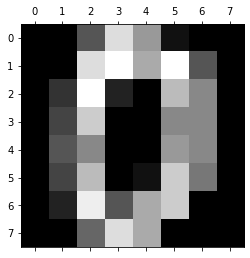

In [ ]:
# Visualize an image
plt.gray()
plt.matshow(digits.images[0])
plt.show()

### Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

### Fitting multi-class logistic regression

Here we will fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial, on the handwritten digits data set and compare the results. 

In [ ]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(max_iter=10000)
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy:", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
lr_mn.fit(X_train, y_train)
print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy:", lr_mn.score(X_test, y_test))

OVR training accuracy: 1.0
OVR test accuracy: 0.9622222222222222
Softmax training accuracy: 1.0
Softmax test accuracy: 0.9622222222222222


### Confusion matrix

In [ ]:
# Confusion matrix between true values and predicted outcomes for one-vs-rest logistic regression classifier
cm_ovr = confusion_matrix(y_test, lr_ovr.predict(X_test))    
cm_ovr

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  0,  1,  0,  3,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 47,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  1, 38,  2],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 37]])

In [ ]:
pd.DataFrame(data = cm_ovr, 
             columns = ['Predicted-'+str(x) for x in range(0,10)], 
             index = ['Actual-'+str(x) for x in range(0,10)])

,Predicted-0,Predicted-1,Predicted-2,Predicted-3,Predicted-4,Predicted-5,Predicted-6,Predicted-7,Predicted-8,Predicted-9
Actual-0,33,0,0,0,0,0,0,0,0,0
Actual-1,0,51,0,0,0,0,1,0,3,0
Actual-2,0,0,41,0,0,0,0,0,0,0
Actual-3,0,0,0,43,0,1,0,0,1,0
Actual-4,0,0,0,0,49,0,0,1,0,0
Actual-5,0,0,0,0,0,43,2,0,0,0
Actual-6,0,0,0,0,0,0,51,0,0,0
Actual-7,0,0,0,1,0,0,0,47,0,0
Actual-8,0,1,0,0,0,1,0,1,38,2
Actual-9,0,0,0,0,0,1,0,0,1,37


In [ ]:
# Confusion matrix between true values and predicted outcomes for softmax classifier
cm_mn = confusion_matrix(y_test, lr_mn.predict(X_test))    
cm_mn

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  0,  1,  0,  3,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 47,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  1, 38,  2],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 37]])

In [ ]:
pd.DataFrame(data = cm_mn, 
             columns = ['Predicted-'+str(x) for x in range(0,10)], 
             index = ['Actual-'+str(x) for x in range(0,10)])

,Predicted-0,Predicted-1,Predicted-2,Predicted-3,Predicted-4,Predicted-5,Predicted-6,Predicted-7,Predicted-8,Predicted-9
Actual-0,33,0,0,0,0,0,0,0,0,0
Actual-1,0,51,0,0,0,0,1,0,3,0
Actual-2,0,0,41,0,0,0,0,0,0,0
Actual-3,0,0,0,43,0,1,0,0,1,0
Actual-4,0,0,0,0,49,0,0,1,0,0
Actual-5,0,0,0,0,0,43,2,0,0,0
Actual-6,0,0,0,0,0,0,51,0,0,0
Actual-7,0,0,0,1,0,0,0,47,0,0
Actual-8,0,1,0,0,0,1,0,1,38,2
Actual-9,0,0,0,0,0,1,0,0,1,37


### Classification Report

In [ ]:
# Classification report for one-vs-rest logistic regression classifier
cr_ovr = classification_report(y_test, lr_ovr.predict(X_test))
print(cr_ovr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.98      0.93      0.95        55
           2       1.00      1.00      1.00        41
           3       0.98      0.96      0.97        45
           4       1.00      0.98      0.99        50
           5       0.93      0.96      0.95        45
           6       0.94      1.00      0.97        51
           7       0.96      0.98      0.97        48
           8       0.88      0.88      0.88        43
           9       0.95      0.95      0.95        39

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [ ]:
# Classification report for softmax classifier
cr_mn = classification_report(y_test, lr_mn.predict(X_test))
print(cr_mn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.98      0.93      0.95        55
           2       1.00      1.00      1.00        41
           3       0.98      0.96      0.97        45
           4       1.00      0.98      0.99        50
           5       0.93      0.96      0.95        45
           6       0.94      1.00      0.97        51
           7       0.96      0.98      0.97        48
           8       0.88      0.88      0.88        43
           9       0.95      0.95      0.95        39

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



### Reference

https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f